# Examining the overlap between antipsychotics analysis with main DE analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2,venn3

## Load DE genes results

In [2]:
ap = pd.read_csv("../../_m/genes/diffExpr_sz_APVctl_full.txt", sep='\t', index_col=0)
noap = pd.read_csv("../../_m/genes/diffExpr_sz_noAPVctl_full.txt", sep='\t', index_col=0)
degs = pd.read_csv("../../../_m/genes/diffExpr_szVctl_full.txt", sep='\t', index_col=0)

### FDR 5% comparison

In [3]:
def get_degs(df, fdr):
    return df[(df["adj.P.Val"] < fdr)]

In [4]:
len(set(get_degs(ap, 0.05).index) & set(get_degs(noap, 0.05).index))

331

In [5]:
len(set(get_degs(ap, 0.05).index) & set(get_degs(noap, 0.05).index)) / len(set(get_degs(noap, 0.05).index))

0.4962518740629685

In [6]:
len(set(get_degs(ap, 0.05).index) & set(get_degs(degs, 0.05).index))

1929

In [7]:
len(set(get_degs(ap, 0.05).index) & set(get_degs(degs, 0.05).index)) / len(set(get_degs(ap, 0.05).index))

0.7165676077265973

In [8]:
len(set(get_degs(noap, 0.05).index) & set(get_degs(degs, 0.05).index))

520

In [9]:
len(set(get_degs(noap, 0.05).index) & set(get_degs(degs, 0.05).index)) / len(set(get_degs(noap, 0.05).index))

0.7796101949025487

## Plot venn diagrams

In [10]:
plt.rcParams.update({'font.size': 22, 'font.weight': 'bold'})

In [34]:
def get_deg_df(feature):
    ap = pd.read_csv("../../_m/%s/diffExpr_sz_APVctl_full.txt" % feature, 
                     sep='\t', index_col=0)
    noap = pd.read_csv("../../_m/%s/diffExpr_sz_noAPVctl_full.txt" % feature, 
                       sep='\t', index_col=0)
    degs = pd.read_csv("../../../_m/%s/diffExpr_szVctl_full.txt" % feature, 
                       sep='\t', index_col=0)
    return ap[(ap['adj.P.Val'] <= 0.05)], noap[(noap['adj.P.Val'] <= 0.05)], degs[(degs['adj.P.Val'] <= 0.05)]


def plot_pairwise_venn(feature, ANTI="Yes"):
    aa, nn, df2 = get_deg_df(feature)
    label2 = "SZ"
    if ANTI == "Yes":
        label = "AP"
        fn = "venn_SZ_vs_AP_%s" % feature
        df1 = aa
    elif ANTI == "No":
        label = "No AP"
        fn = "venn_SZ_vs_noAP_%s" % feature
        df1 = nn
    else:
        label = "AP"
        label2 = "No AP"
        df1 = aa; df2 = nn
        fn = "venn_AP_vs_noAP_%s" % feature
    plt.figure(figsize=(8,8))
    v = venn2([set(df1.index), set(df2.index)], 
              set_labels = (label, label2))
    v.get_patch_by_id('10').set_color('red')
    v.get_patch_by_id('10').set_alpha(0.75)
    v.get_patch_by_id('01').set_color('blue')
    v.get_patch_by_id('01').set_alpha(0.75)
    try:
        v.get_patch_by_id('11').set_color('purple')
        v.get_patch_by_id('11').set_alpha(0.75)
    except AttributeError:
        print("There is no overlap!")
    plt.savefig('%s.png' % fn)
    plt.savefig('%s.pdf' % fn)
    

def plot_venn3(feature):
    aa, nn, dd = get_deg_df(feature)
    plt.figure(figsize=(10,10))
    v = venn3([set(aa.index), set(nn.index), set(dd.index)], 
              set_labels = ('AP', "No AP", 'SZ'))
    plt.savefig('venn_antipsychotics_%s.png' % (feature))
    plt.savefig('venn_antipsychotics_%s.pdf' % (feature))

### Plot overlaps

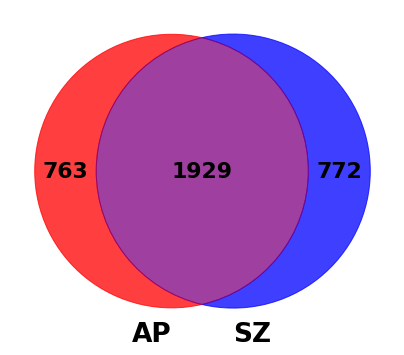

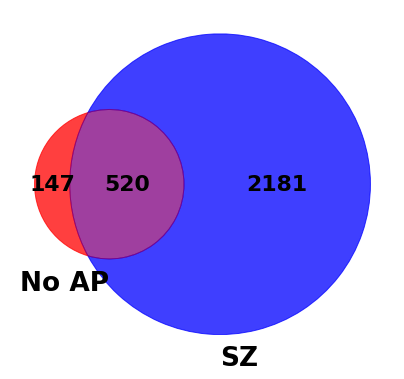

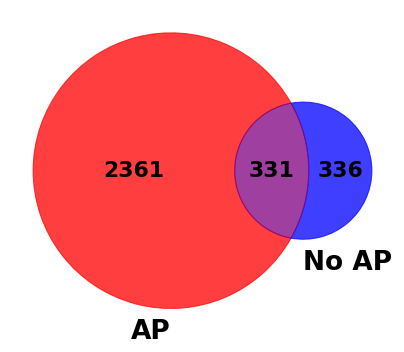

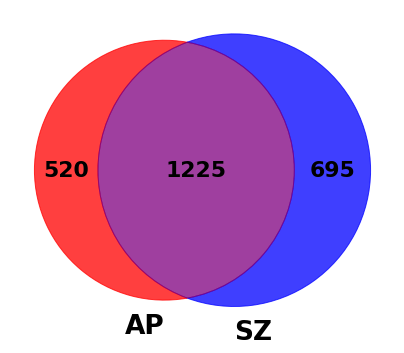

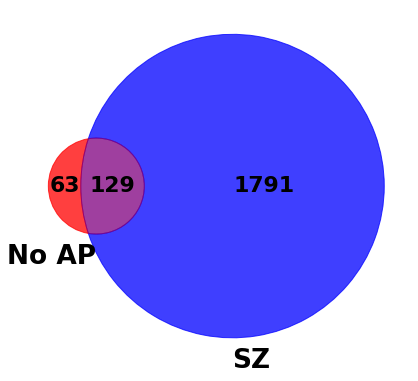

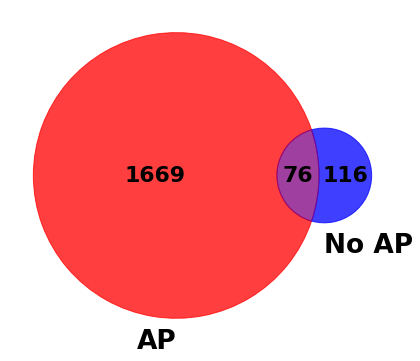

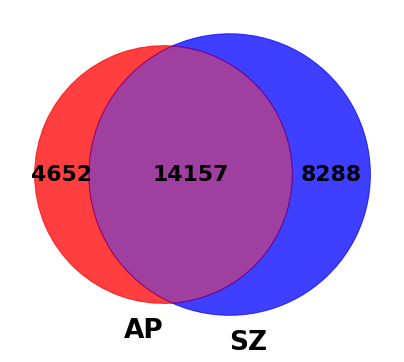

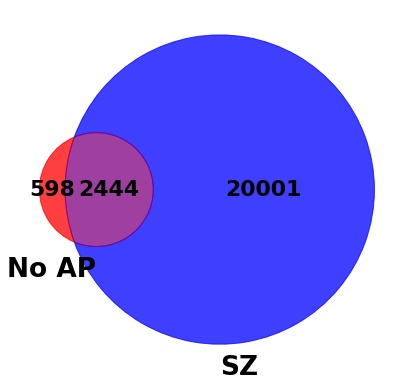

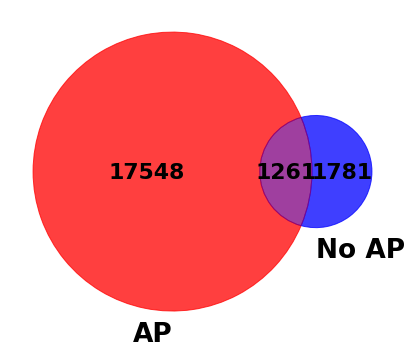

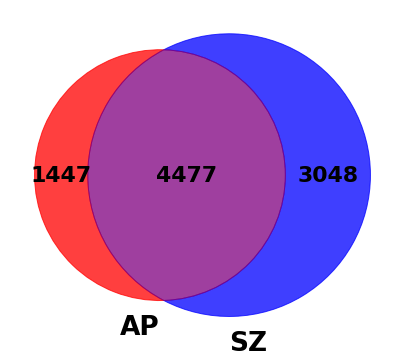

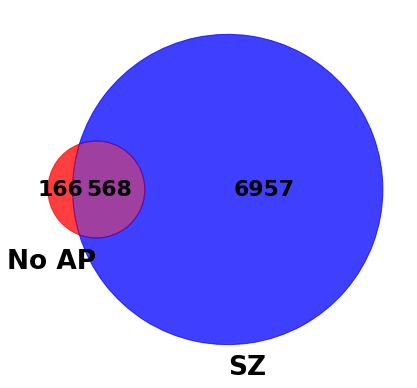

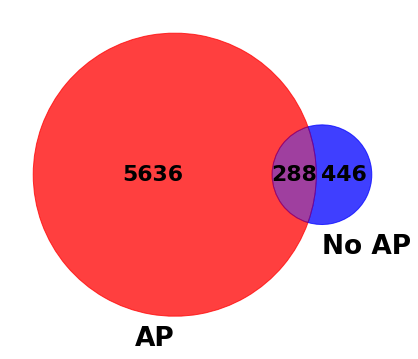

In [35]:
for feature in ["genes", "transcripts", "exons", "junctions"]:
    plot_pairwise_venn(feature, "Yes")
    plot_pairwise_venn(feature, "No")
    plot_pairwise_venn(feature, "Both")
    plot_venn3(feature)